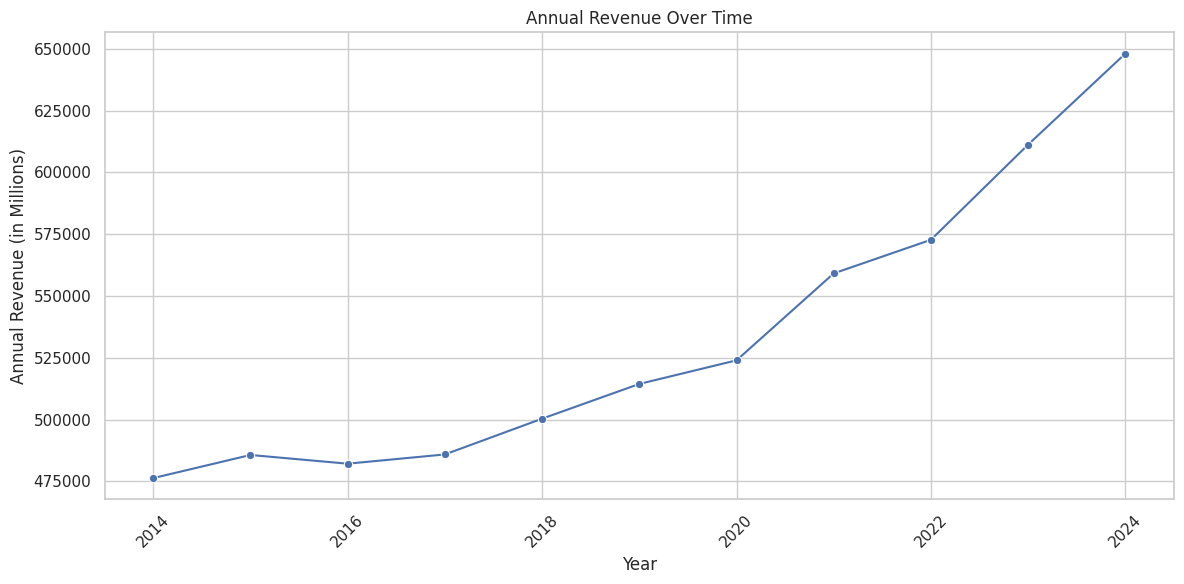

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file and correct sheet
file_path = "Assignment-03 Initial dataset.xlsx"  # Adjust path if necessary
sheet_name = "Assets and Liabilities"

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Convert string values like "$86.94B" to float (in billions)
def convert_billion(value):
    if isinstance(value, str) and "B" in value:
        return float(value.replace("$", "").replace("B", ""))
    return value

df["Current Assets (B)"] = df["Current Assets"].apply(convert_billion)
df["Current Liabilities (B)"] = df["Current Liabilities"].apply(convert_billion)

# Select required columns
df_plot = df[["Year", "Annual Revenue", "Current Ratio", "Employee Count",
              "Current Assets (B)", "Current Liabilities (B)"]]

# print(df_plot.head())s
# Set seaborn style
sns.set(style="whitegrid")

# Chart 1: Annual Revenue Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x="Year", y="Annual Revenue", marker='o')
plt.title("Annual Revenue Over Time")
plt.ylabel("Annual Revenue (in Millions)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



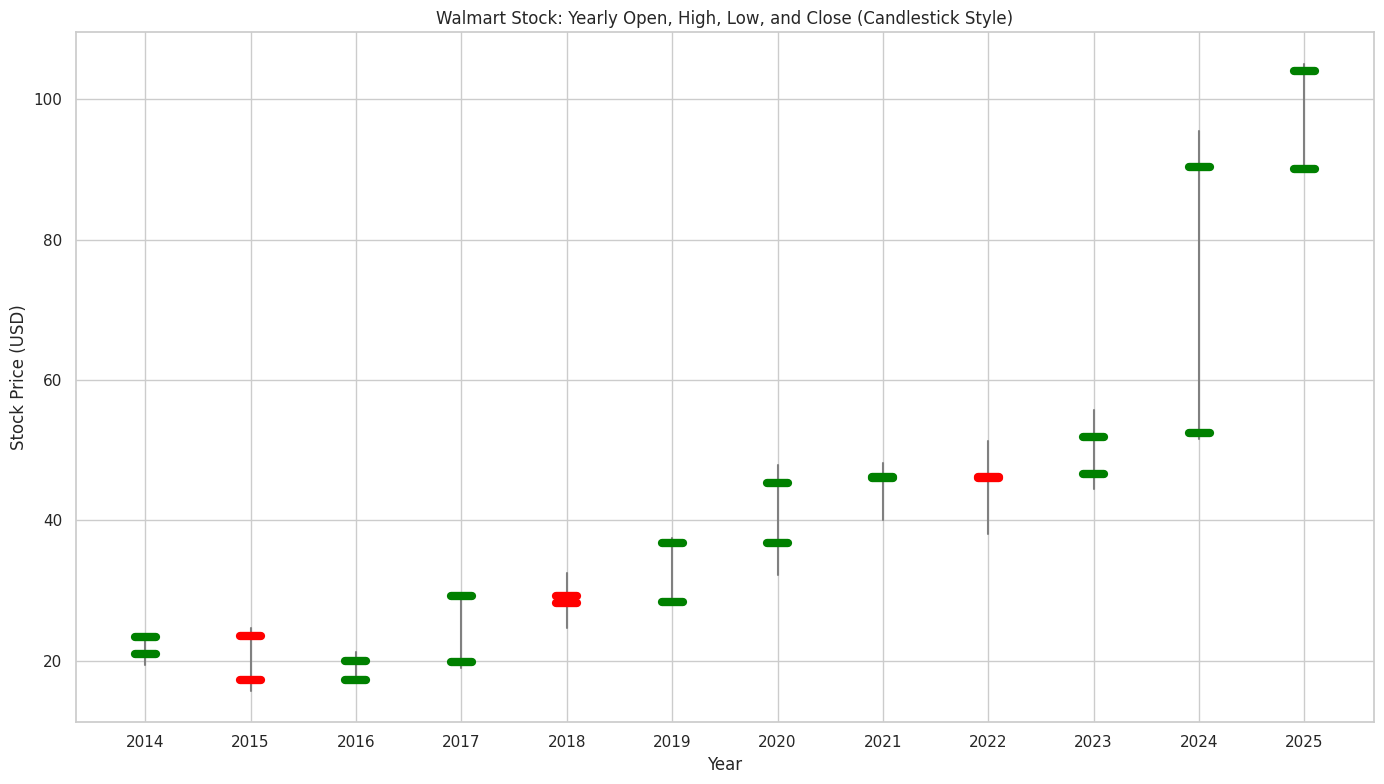

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and sheet
file_path = "Assignment-03 Initial dataset.xlsx"  # Adjust the path as needed
sheet_name = "PRICES- Walmart Historica"

# Read the Excel sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Use row 1 as column headers
df.columns = df.iloc[0]
df = df[1:]

# Convert relevant columns to numeric
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')
df["Year Open"] = pd.to_numeric(df["Year Open"], errors='coerce')
df["Year High"] = pd.to_numeric(df["Year High"], errors='coerce')
df["Year Low"] = pd.to_numeric(df["Year Low"], errors='coerce')
df["Year Close"] = pd.to_numeric(df["Year Close"], errors='coerce')
df["Annual % Change"] = pd.to_numeric(df["Annual % Change"], errors='coerce')

# Drop rows with missing Year
df = df.dropna(subset=["Year"])
df["Year"] = df["Year"].astype(int)

# Plot candlestick-style yearly summary
plt.figure(figsize=(14, 8))
for _, row in df.iterrows():
    # High-Low line
    plt.plot([row["Year"], row["Year"]], [row["Year Low"], row["Year High"]], color='gray')

    # Open and Close price bars
    color = 'green' if row["Year Close"] > row["Year Open"] else 'red'
    plt.plot([row["Year"] - 0.1, row["Year"] + 0.1], [row["Year Open"], row["Year Open"]], color=color, linewidth=6)
    plt.plot([row["Year"] - 0.1, row["Year"] + 0.1], [row["Year Close"], row["Year Close"]], color=color, linewidth=6)

# Styling
plt.title("Walmart Stock: Yearly Open, High, Low, and Close (Candlestick Style)")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
plt.xticks(df["Year"])
plt.tight_layout()
plt.show()


<ipython-input-8-07c3cb0c92f7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="COMPANY NAME", y="MARKET SHARE Q4 2024", palette="Blues_d")
<ipython-input-8-07c3cb0c92f7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="COMPANY NAME", y="Share Change", palette="coolwarm")


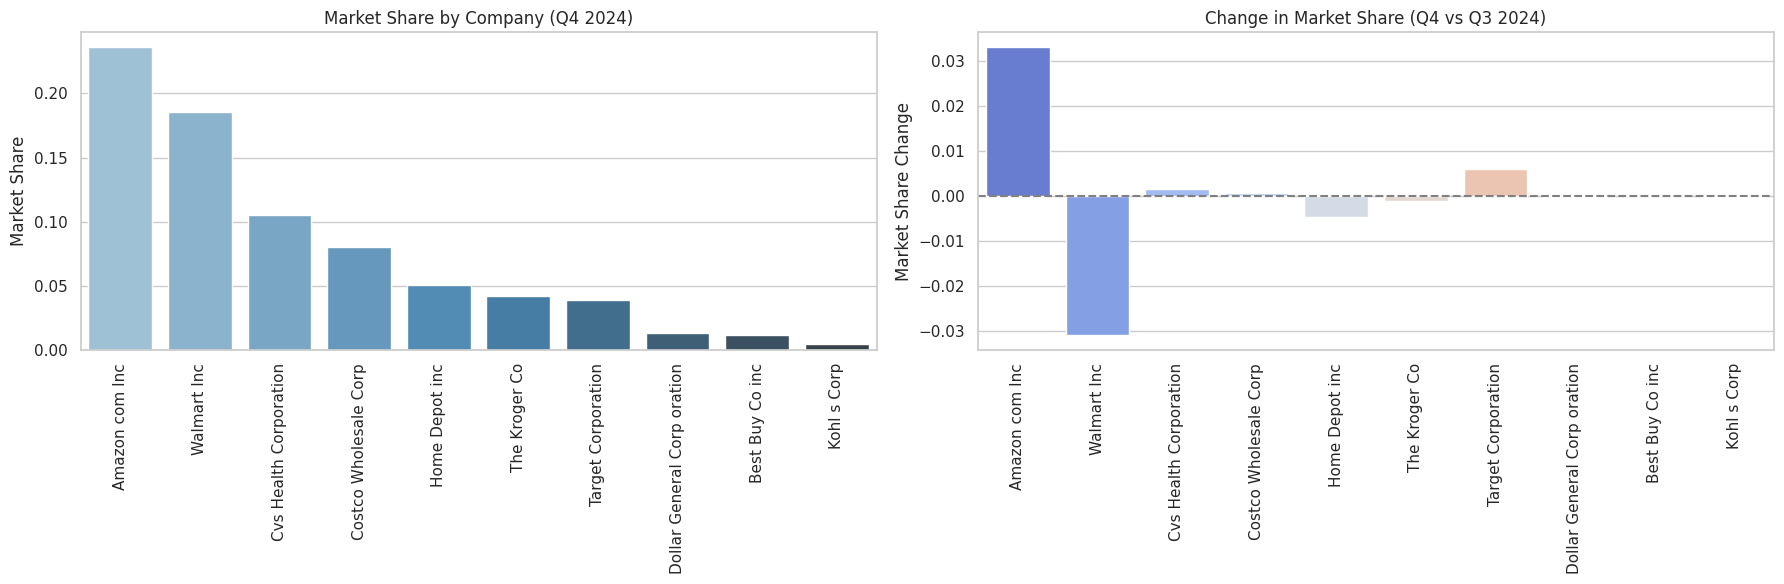

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file and sheet
file_path = "Assignment-03 Initial dataset.xlsx"
sheet_name = "Walmart’s Market Share vs. Comp"

# Read data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Clean: remove subtotal and notes like "VIZ IDEA"
df = df[~df["COMPANY NAME"].str.contains("SUBTOTAL|VIZ IDEA", case=False, na=False)]

# Convert necessary columns
df["MARKET SHARE Q4 2024"] = pd.to_numeric(df["MARKET SHARE  MRQ Q4 2024"], errors='coerce')
df["MARKET SHARE Q3 2024"] = pd.to_numeric(df["MARKET SHARE A Quarter Before Q3 2024"], errors='coerce')
df["Share Change"] = df["MARKET SHARE Q4 2024"] - df["MARKET SHARE Q3 2024"]

# Sort for cleaner visuals
df = df.sort_values("MARKET SHARE Q4 2024", ascending=False)

# Plot using subplots
plt.figure(figsize=(18, 6))

# Subplot 1: Market Share Q4 2024
plt.subplot(1, 2, 1)
sns.barplot(data=df, x="COMPANY NAME", y="MARKET SHARE Q4 2024", palette="Blues_d")
plt.title("Market Share by Company (Q4 2024)")
plt.ylabel("Market Share")
plt.xlabel("")
plt.xticks(rotation=90)

# Subplot 2: Market Share Change Q3 -> Q4
plt.subplot(1, 2, 2)
sns.barplot(data=df, x="COMPANY NAME", y="Share Change", palette="coolwarm")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Change in Market Share (Q4 vs Q3 2024)")
plt.ylabel("Market Share Change")
plt.xlabel("")
plt.xticks(rotation=90)

# Layout adjustment
plt.tight_layout()
plt.show()


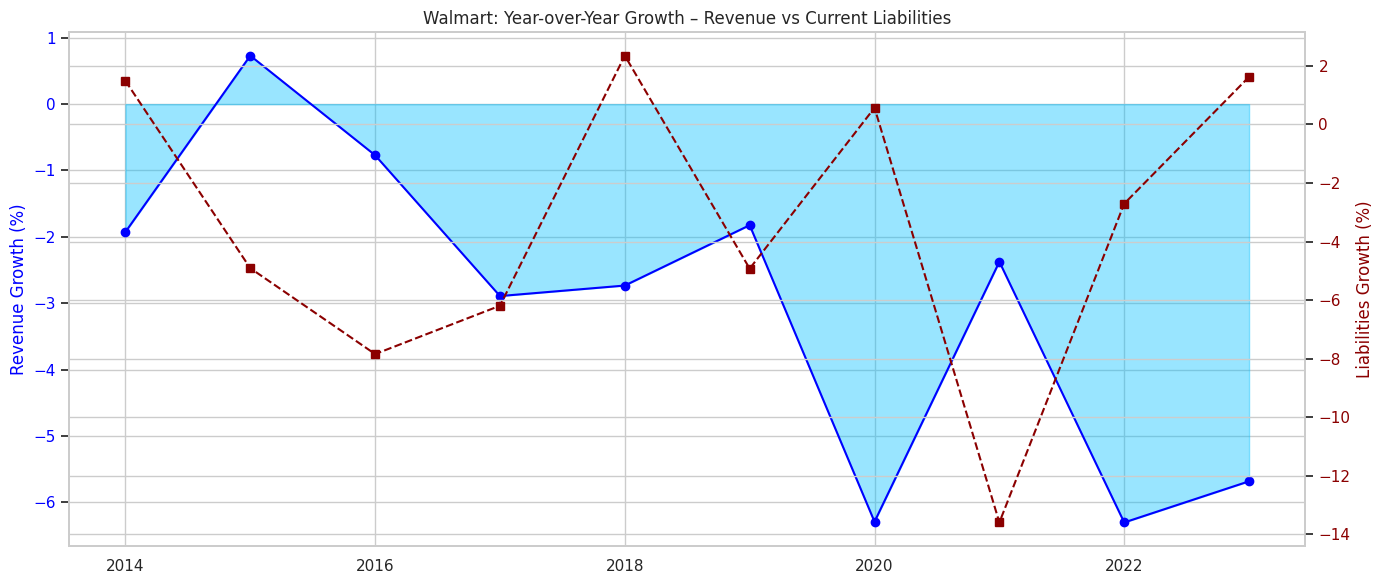

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data from Excel
file_path = "Assignment-03 Initial dataset.xlsx"
expenses_df = pd.read_excel(file_path, sheet_name="Expenses Vs Revenue Growth")

# Extract the first 4 rows (Revenue, Assets, Current Assets, Current Liabilities)
table_df = expenses_df.iloc[0:4].copy()
table_df = table_df.set_index("Year").transpose().reset_index()
table_df = table_df.rename(columns={"index": "Year"})

# Convert data to numeric
table_df["Year"] = table_df["Year"].astype(int)
table_df["Revenue"] = pd.to_numeric(table_df["Revenue"], errors='coerce')
table_df["Current Liabilities"] = table_df["Current Liabilities"].replace('[\$,B]', '', regex=True).astype(float)

# Calculate growth %
table_df["Revenue Growth (%)"] = table_df["Revenue"].pct_change() * 100
table_df["Liabilities Growth (%)"] = table_df["Current Liabilities"].pct_change() * 100

# Filter clean data for plotting
growth_df = table_df.dropna(subset=["Revenue Growth (%)", "Liabilities Growth (%)"])
years = growth_df["Year"].astype(float).to_numpy()
revenue_growth = growth_df["Revenue Growth (%)"].astype(float).to_numpy()
liabilities_growth = growth_df["Liabilities Growth (%)"].astype(float).to_numpy()

# Create dual-axis chart
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.fill_between(years, revenue_growth, alpha=0.4, color='deepskyblue')
ax1.plot(years, revenue_growth, color='blue', marker='o', label="Revenue Growth (%)")
ax1.set_ylabel("Revenue Growth (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(years, liabilities_growth, color='darkred', marker='s', linestyle='--', label="Liabilities Growth (%)")
ax2.set_ylabel("Liabilities Growth (%)", color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title("Walmart: Year-over-Year Growth – Revenue vs Current Liabilities")
plt.grid(True)
fig.tight_layout()
plt.show()
